# FACE RECOGNITION

## Import the required libraries. 

In [10]:
import numpy as np
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from PIL import Image
from keras.models import load_model
import mtcnn
import matplotlib.pyplot as plt


### I have a set of images stored in the form of  'name.extension' . Loading and displaying them.

In [8]:
def loadImages(path):
    # return array of images

    imagesList = os.listdir(path)
    loadedImages = []
    for image in imagesList:
        img = Image.open(path + image)
        loadedImages.append(img)

    return loadedImages



imgs = loadImages('face-recognition/')



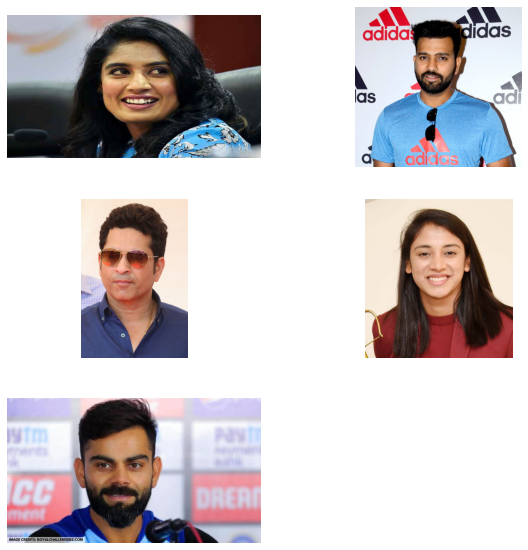

In [12]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,2,i+1)
    plt.imshow(imgs[i])
    plt.axis('off')

## For face recognition, we will first need to locate the face in an image.
### The following function takes an image as input and returns just the face as an array of intensity values. 

In [17]:
def get_face_array(file,required_size=(160,160)):
    image=Image.open(file)
    image_pixels=np.asarray(image)
    detector=mtcnn.MTCNN()
    box=detector.detect_faces(image_pixels)
    x1,y1,width,height=box[0]['box']
    x1,y1=abs(x1),abs(y1) # Taking absolute values in case we get negative values.
    x2,y2=x1+width,y1+height
    face_pixels=image_pixels[y1:y2,x1:x2]
    face_image=Image.fromarray(face_pixels)
    face_image=face_image.resize(required_size)
    face_array=np.asarray(face_image)
    return face_array

### This function converts the images into two arrays-one with names and the other with the face arrays.   

In [16]:
def make_dataset(directory):
    face_arrays,names=[],[]
    for file in os.listdir(directory):
        path=directory+file
        base=os.path.basename(path)
        name=os.path.splitext(base)[0]        
        names.append(name)
        face_array=get_face_array(path)
        face_arrays.append(face_array)
    return np.asarray(face_arrays),np.asarray(names)

In [ ]:
face_arrays,names=make_dataset('face-recognition/')

### We pass the face arrays through the model  to get embeddings.Then we create a database which is a dictionary with keys as names and values as embeddings.

In [5]:
def generate_embedding(face_array,model):
    normalized_data=face_array/255
    embedding=model.predict(np.expand_dims(normalized_data,axis=0))
    return embedding

In [6]:
def generate_database(face_arrays,names,model):
    database={}
    for i in range(len(names)):
        database[names[i]]=generate_embedding(face_arrays[i],model)
    return database
    
    

### We use the facenet model. 

In [7]:
model=load_model('facenet_keras.h5')

In [ ]:
database=generate_database(face_arrays,names,model)

### Saving the created database for future use. 

In [9]:
np.savez_compressed('face-recognition-full-embeddings-database',database)

### Finally predicting the identity of the person in the test image.  

In [18]:
def predict(database,file):
    face_array=get_face_array(file)
    file_embedding=generate_embedding(face_array,model)
    min_dist=100    #Initialising the distance between test image and stored embeddings to be a large number.
    for (name,database_embedding) in database.items():
        dist = np.linalg.norm(file_embedding-database_embedding)
        if dist<min_dist:
            min_dist=dist
            identity=name
    if min_dist>10:
        print("Person not in database")
    else:
        print(f"Person is {str(identity)} and distance is {min_dist}" )
    return _

### Predicitng for person not in database. 

In [19]:
_=predict(database,'rayudu.jpg')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

### Predicting for person in database. 

In [12]:
_=predict(database,'rohit_sharma_test.jpg')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set